In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, MAT, LinearAlgebra

In [3]:
import Statistics: mean

In [4]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt = 1e-2
n, cross = 53, false
path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/data/hanks_data_sessions"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/data/hanks_data_sessions"

## Load neural fits

In [5]:
region, delay = "STR", 6
ratnum = 9:11
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_STR, μ_rnt_STR = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);
ntrials_STR = sum(length.(data_STR));

In [6]:
region, delay = "FOF", 6
ratnum = 1:5
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_FOF, μ_rnt_FOF = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);
ntrials_FOF = sum(length.(data_FOF));

In [7]:
using PyPlot

In [8]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/CV"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/CV"

In [9]:
import Base.Iterators: partition

In [10]:
LL_joint_STR_folds = Vector{Float64}(undef,5)
joint_model_folds_STR = Vector(undef,5)
region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    f = all_Softplus(data_STR)  

    joint_model_folds_STR[fold] = neural_choiceDDM(θneural_choice(xfolds, f), test_data_STR, n, cross);

    LL_joint_STR_folds[fold] = (pulse_input_DDM.joint_loglikelihood(joint_model_folds_STR[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_STR...), :choice)));
end

In [11]:
LL_joint_FOF_folds = Vector{Float64}(undef,5)
joint_model_folds_FOF = Vector(undef,5)
region = "FOF"
ntrials = length.(data_FOF);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_FOF = map((data, train)-> data[train], data_FOF, test)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    f = all_Softplus(data_FOF)  

    joint_model_folds_FOF[fold] = neural_choiceDDM(θneural_choice(xfolds, f), test_data_FOF, n, cross);

    LL_joint_FOF_folds[fold] = (pulse_input_DDM.joint_loglikelihood(joint_model_folds_FOF[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_FOF...), :choice)));
end

## Sep

In [12]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/CV_sep"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/CV_sep"

In [13]:
import pulse_input_DDM: sep_joint_loglikelihood

In [14]:
LL_joint_FOF_folds_sep = Vector{Float64}(undef,5)
joint_model_folds_FOF_sep = Vector(undef,5)
region = "FOF"
ntrials = length.(data_FOF);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_FOF = map((data, train)-> data[train], data_FOF, test)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    f = all_Softplus(data_FOF)  

    joint_model_folds_FOF_sep[fold] = neural_choiceDDM(θneural_choice(xfolds, f), test_data_FOF, n, cross);

    LL_joint_FOF_folds_sep[fold] = (pulse_input_DDM.sep_joint_loglikelihood(joint_model_folds_FOF_sep[fold]))/(log(2) * 
        length(vcat(test...)));
end

In [15]:
LL_joint_FOF_folds_sep - LL_joint_FOF_folds

5-element Vector{Float64}:
 -0.032709707812557554
 -0.09452332736722724
 -0.08627684833246008
 -0.038868456975492904
 -0.05202452424391879

In [16]:
LL_joint_STR_folds_sep = Vector{Float64}(undef,5)
joint_model_folds_STR_sep = Vector(undef,5)
region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    f = all_Softplus(data_STR)  

    joint_model_folds_STR_sep[fold] = neural_choiceDDM(θneural_choice(xfolds, f), test_data_STR, n, cross);

    LL_joint_STR_folds_sep[fold] = (pulse_input_DDM.sep_joint_loglikelihood(joint_model_folds_STR_sep[fold]))/(log(2) * 
        length(vcat(test...)));
end

In [17]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/CV"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/CV"

In [18]:
LL_joint_STR_folds_sep_2 = Vector{Float64}(undef,5)
joint_model_folds_STR_sep_2 = Vector(undef,5)
region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    f = all_Softplus(data_STR)  

    joint_model_folds_STR_sep_2[fold] = neural_choiceDDM(θneural_choice(xfolds, f), test_data_STR, n, cross);

    LL_joint_STR_folds_sep_2[fold] = (pulse_input_DDM.sep_joint_loglikelihood(joint_model_folds_STR_sep_2[fold]))/(log(2) * 
        length(vcat(test...)));
end

In [19]:
LL_joint_STR_folds_sep - LL_joint_STR_folds_sep_2

5-element Vector{Float64}:
 0.2516384992715075
 0.14426050062556328
 0.23952754414239052
 0.10944249134095685
 0.25152585759012425

In [20]:
LL_joint_STR_folds_sep_2

5-element Vector{Float64}:
 -103.48227624357814
 -104.17355455779015
 -102.28854688992884
 -101.31232518886047
  -98.83989715243992

In [21]:
LL_joint_STR_folds_sep - LL_joint_STR_folds

5-element Vector{Float64}:
 0.3664982874155669
 0.22853947743891467
 0.29830476459989086
 0.30477338495900597
 0.8519997956239109

In [22]:
using PyPlot
mycolors = ["red", "#1822A0", "#A01892"]

3-element Vector{String}:
 "red"
 "#1822A0"
 "#A01892"

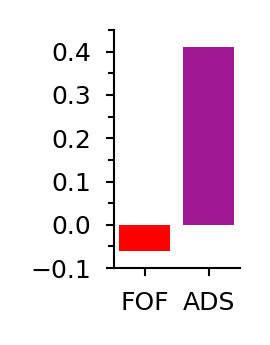

In [23]:
figure(figsize=(1., 1.25), dpi=300, frameon=true)

mycolors = ["red", "#A01892"]
rc("xtick", labelsize=6)
rc("ytick", labelsize=6)

bar(1, mean(LL_joint_FOF_folds_sep - LL_joint_FOF_folds), color=mycolors[1]);
bar(2, mean(LL_joint_STR_folds_sep - LL_joint_STR_folds), color=mycolors[2]);
xticks([1, 2], ["FOF", "ADS"], rotation=0, fontsize=6)
#ylabel("Δbits/trial", fontsize=6);

ax = gca()
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
ax.set_yticks(range(-0.1, stop=0.4, length=6))
ax.set_yticks(range(-0.1, stop=0.45, length=12), minor=true)
#ax.set_xticks(range(-40, stop=40, length=3))
#ax.set_xticks(range(-50, stop=50, length=11), minor=true)
ax.tick_params(which="minor", width=0.5, length=1.5)
#ax.set_ylim(0, 1)
ax.set_ylim(-0.1, 0.45)

tight_layout()
#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig5/Fig5-joint-bars.pdf")

## Reload neural

In [24]:
LL_neural_STR_folds = Vector{Float64}(undef,5)
neural_model_folds_STR = Vector(undef,5)

5-element Vector{Any}:
 #undef
 #undef
 #undef
 #undef
 #undef

In [25]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/neural/CV"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/neural/CV"

In [26]:
region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)
    train_data_STR = map((data, train)-> data[train], data_STR, train)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    
    f = all_Softplus(data_STR)      
    neural_model_folds_STR[fold] = neuralDDM(θ=θneural(xfolds, f), data=test_data_STR, n=n, cross=cross);     
    LL_neural_STR_folds[fold] = (pulse_input_DDM.loglikelihood(neural_model_folds_STR[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_STR...), :choice)));
    
end

In [27]:
LL_neural_FOF_folds = Vector{Float64}(undef,5)
neural_model_folds_FOF = Vector(undef,5)

5-element Vector{Any}:
 #undef
 #undef
 #undef
 #undef
 #undef

In [28]:
region = "FOF"
ntrials = length.(data_FOF);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_FOF = map((data, train)-> data[train], data_FOF, test)
    train_data_FOF = map((data, train)-> data[train], data_FOF, train)

    file = joinpath(save_path, region*"_"*string(fold)*".mat")
    xfolds = read(matopen(file), "ML_params");
    
    f = all_Softplus(data_FOF)      
    neural_model_folds_FOF[fold] = neuralDDM(θ=θneural(xfolds, f), data=test_data_FOF, n=n, cross=cross);     
    LL_neural_FOF_folds[fold] = (pulse_input_DDM.loglikelihood(neural_model_folds_FOF[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_FOF...), :choice)));
    
end

In [29]:
LL_neural_FOF_folds_sep = Vector{Float64}(undef,5)
neural_model_folds_FOF_sep = Vector(undef,5)

5-element Vector{Any}:
 #undef
 #undef
 #undef
 #undef
 #undef

In [30]:
import pulse_input_DDM: sep_neural_loglikelihood

In [31]:
region = "FOF"
ntrials = length.(data_FOF);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_FOF = map((data, train)-> data[train], data_FOF, test)
    train_data_FOF = map((data, train)-> data[train], data_FOF, train)

    file = joinpath(save_path, region*"_"*string(fold)*"_sep.mat")
    xfolds = read(matopen(file), "ML_params");  
    
    f = all_Softplus(data_FOF)      
    
    neural_model_folds_FOF_sep[fold] = neuralDDM(θ=θneural(xfolds, f), data=test_data_FOF, n=n, cross=cross);

    LL_neural_FOF_folds_sep[fold] = (pulse_input_DDM.sep_neural_loglikelihood(neural_model_folds_FOF_sep[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_FOF...), :choice)));
    
end

In [32]:
LL_neural_FOF_folds_sep

5-element Vector{Float64}:
 -71.45051446186062
 -72.55420131130072
 -72.78731825893375
 -71.68393205906406
 -70.49942395023145

In [33]:
LL_neural_FOF_folds_sep

5-element Vector{Float64}:
 -71.45051446186062
 -72.55420131130072
 -72.78731825893375
 -71.68393205906406
 -70.49942395023145

In [34]:
LL_neural_STR_folds_sep = Vector{Float64}(undef,5)
neural_model_folds_STR_sep = Vector(undef,5)

5-element Vector{Any}:
 #undef
 #undef
 #undef
 #undef
 #undef

In [35]:
region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)
    train_data_STR = map((data, train)-> data[train], data_STR, train)

    file = joinpath(save_path, region*"_"*string(fold)*"_sep.mat")
    xfolds = read(matopen(file), "ML_params");

    f = all_Softplus(data_STR)      
    
    neural_model_folds_STR_sep[fold] = neuralDDM(θ=θneural(xfolds, f), data=test_data_STR, n=n, cross=cross);

    LL_neural_STR_folds_sep[fold] = (pulse_input_DDM.sep_neural_loglikelihood(neural_model_folds_STR_sep[fold]))/(log(2) * 
        length(getfield.(vcat(test_data_STR...), :choice)));
    
end

In [36]:
mean(LL_neural_FOF_folds_sep - LL_neural_FOF_folds)

-0.039173702241333784

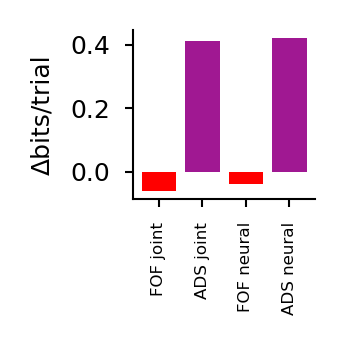

In [37]:
figure(figsize=(1.25, 1.25), dpi=300, frameon=true)

mycolors = ["red", "#A01892"]
rc("xtick", labelsize=6)
rc("ytick", labelsize=6)

bar(1, mean(LL_joint_FOF_folds_sep - LL_joint_FOF_folds), color=mycolors[1]);
bar(2, mean(LL_joint_STR_folds_sep - LL_joint_STR_folds), color=mycolors[2]);

bar(3, mean(LL_neural_FOF_folds_sep - LL_neural_FOF_folds), color=mycolors[1]);
bar(4, mean(LL_neural_STR_folds_sep - LL_neural_STR_folds), color=mycolors[2]);
xticks([1, 2, 3, 4], ["FOF joint", "ADS joint", "FOF neural", "ADS neural"], rotation=90, fontsize=4)
ylabel("Δbits/trial", fontsize=6);

ax = gca()
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
#ax.set_yticks(range(-0.2, stop=0.4, length=6))
#ax.set_yticks(range(-0.2, stop=0.45, length=12), minor=true)
#ax.set_xticks(range(-40, stop=40, length=3))
#ax.set_xticks(range(-50, stop=50, length=11), minor=true)
ax.tick_params(which="minor", width=0.5, length=1.5)
#ax.set_ylim(0, 1)
#ax.set_ylim(-0.3, 0.45)

tight_layout()
#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig5/Fig5-joint-bars.pdf")

In [38]:
## Is it the tuning curve parameters?

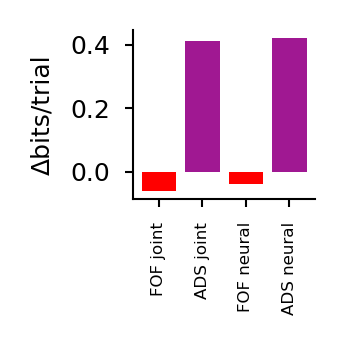

In [39]:
figure(figsize=(1.25, 1.25), dpi=300, frameon=true)

mycolors = ["red", "#A01892"]
rc("xtick", labelsize=6)
rc("ytick", labelsize=6)

bar(1, mean(LL_joint_FOF_folds_sep - LL_joint_FOF_folds), color=mycolors[1]);
bar(2, mean(LL_joint_STR_folds_sep - LL_joint_STR_folds), color=mycolors[2]);

bar(3, mean(LL_neural_FOF_folds_sep - LL_neural_FOF_folds), color=mycolors[1]);
bar(4, mean(LL_neural_STR_folds_sep - LL_neural_STR_folds), color=mycolors[2]);
xticks([1, 2, 3, 4], ["FOF joint", "ADS joint", "FOF neural", "ADS neural"], rotation=90, fontsize=4)
ylabel("Δbits/trial", fontsize=6);

ax = gca()
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
#ax.set_yticks(range(-0.2, stop=0.4, length=6))
#ax.set_yticks(range(-0.2, stop=0.45, length=12), minor=true)
#ax.set_xticks(range(-40, stop=40, length=3))
#ax.set_xticks(range(-50, stop=50, length=11), minor=true)
ax.tick_params(which="minor", width=0.5, length=1.5)
#ax.set_ylim(0, 1)
#ax.set_ylim(-0.3, 0.45)

tight_layout()
PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Supp/joint_neural_indp_shared.pdf")

In [40]:
mean(LL_neural_STR_folds_sep - LL_neural_STR_folds)

0.4219489352680171

In [41]:
LL_neural_STR_folds_sep - LL_neural_STR_folds

5-element Vector{Float64}:
 0.3282493993454665
 0.25071805720223495
 0.2914543901131026
 0.34725969188758654
 0.8920631377916948

In [120]:
boo2 = vcat(map(x-> vcat(vcat(map(x-> map(x-> map(x-> x.c, x), x), 
            getfield.(getfield.([x], :θ), :θy))...)...), neural_model_folds_STR)...);

In [121]:
boo1 = vcat(map(x-> vcat(vcat(map(x-> map(x-> map(x-> x.c, x), x), 
            getfield.(getfield.([x], :θ), :θy))...)...), neural_model_folds_STR_sep)...);

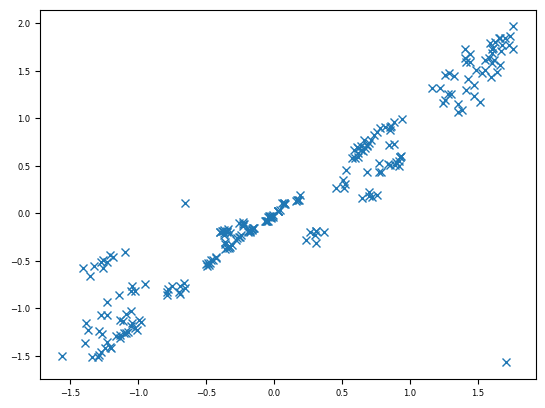

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6df869c400>

In [122]:
plot(boo1, boo2, "x")

In [45]:
getfield.(getfield.(neural_model_folds_STR_sep, :θ), :θz)

5-element Vector{θz{Float64}}:
 θz{Float64}
  σ2_i: Float64 42.491317332404186
  B: Float64 39.99986425949562
  λ: Float64 -0.6800554863737305
  σ2_a: Float64 203.45333978292317
  σ2_s: Float64 0.5407327080138064
  ϕ: Float64 0.0010001023205439758
  τ_ϕ: Float64 0.0242469737322717

 θz{Float64}
  σ2_i: Float64 45.22885069859074
  B: Float64 39.999999999562036
  λ: Float64 -0.7687319883310796
  σ2_a: Float64 182.90288395114607
  σ2_s: Float64 1.387251676657264
  ϕ: Float64 0.0010002713642260166
  τ_ϕ: Float64 0.02229496676603072

 θz{Float64}
  σ2_i: Float64 47.55358979586336
  B: Float64 39.99999319241219
  λ: Float64 -0.710313548930961
  σ2_a: Float64 224.70618746844434
  σ2_s: Float64 0.42217245443978996
  ϕ: Float64 0.0010002706445139257
  τ_ϕ: Float64 0.021750568964900765

 θz{Float64}
  σ2_i: Float64 41.8825810004663
  B: Float64 39.99999167565256
  λ: Float64 -0.7196896864703487
  σ2_a: Float64 200.16521877459542
  σ2_s: Float64 1.0787318367031509
  ϕ: Float64 0.00100013899920257

In [46]:
getfield.(getfield.(joint_model_folds_STR_sep, :θ), :θz)

5-element Vector{θz{Float64}}:
 θz{Float64}
  σ2_i: Float64 42.64893660175
  B: Float64 39.99999994642306
  λ: Float64 -0.6616646558961609
  σ2_a: Float64 203.40893859168668
  σ2_s: Float64 0.7332233266891585
  ϕ: Float64 0.001215597016223416
  τ_ϕ: Float64 0.024051642481230092

 θz{Float64}
  σ2_i: Float64 45.244230438711995
  B: Float64 39.94706884665147
  λ: Float64 -0.7040168565752446
  σ2_a: Float64 182.89794698185892
  σ2_s: Float64 1.4189166001118991
  ϕ: Float64 0.001005997304824806
  τ_ϕ: Float64 0.02242128729760158

 θz{Float64}
  σ2_i: Float64 47.55572993045823
  B: Float64 39.992690174557886
  λ: Float64 -0.6585087478059194
  σ2_a: Float64 224.70501410142128
  σ2_s: Float64 0.42617368981785275
  ϕ: Float64 0.0010000004126168743
  τ_ϕ: Float64 0.021969464047496834

 θz{Float64}
  σ2_i: Float64 41.88258101851687
  B: Float64 39.999991532171165
  λ: Float64 -0.7196860706531212
  σ2_a: Float64 200.1652187680864
  σ2_s: Float64 1.0787320171918715
  ϕ: Float64 0.00100161420518794

In [47]:
getfield.(getfield.(joint_model_folds_STR, :θ), :θz)

5-element Vector{θz{Float64}}:
 θz{Float64}
  σ2_i: Float64 23.91906695607539
  B: Float64 18.798078047465285
  λ: Float64 0.2606688156465576
  σ2_a: Float64 192.67520349778238
  σ2_s: Float64 0.43907331630413765
  ϕ: Float64 0.12520363685991387
  τ_ϕ: Float64 0.01671224963841894

 θz{Float64}
  σ2_i: Float64 23.22188660654463
  B: Float64 39.87975516685547
  λ: Float64 -0.6619346686676844
  σ2_a: Float64 177.88724640216168
  σ2_s: Float64 1.3070210998879257
  ϕ: Float64 0.016091574733121467
  τ_ϕ: Float64 0.019303960505075414

 θz{Float64}
  σ2_i: Float64 25.915529300144268
  B: Float64 19.563913034399906
  λ: Float64 0.04781264718440683
  σ2_a: Float64 194.04790914974453
  σ2_s: Float64 0.6703019116401673
  ϕ: Float64 0.0756960675267524
  τ_ϕ: Float64 0.018448805988438614

 θz{Float64}
  σ2_i: Float64 20.393300266601532
  B: Float64 39.99995119695791
  λ: Float64 -0.6668943650124093
  σ2_a: Float64 181.65714886413556
  σ2_s: Float64 0.8217914673359119
  ϕ: Float64 0.00100290603648611

In [48]:
getfield.(getfield.(neural_model_folds_STR, :θ), :θz)

5-element Vector{θz{Float64}}:
 θz{Float64}
  σ2_i: Float64 21.172648437794525
  B: Float64 39.95355449213889
  λ: Float64 -0.7626461652985859
  σ2_a: Float64 213.27957945090196
  σ2_s: Float64 0.001003982807002487
  ϕ: Float64 0.0538653930818692
  τ_ϕ: Float64 0.01882752875374399

 θz{Float64}
  σ2_i: Float64 19.64440276410493
  B: Float64 39.5495342443759
  λ: Float64 -0.8016564029604687
  σ2_a: Float64 185.8832283998723
  σ2_s: Float64 0.001003480204144361
  ϕ: Float64 0.055573082138472146
  τ_ϕ: Float64 0.021814456014579257

 θz{Float64}
  σ2_i: Float64 22.575789277108022
  B: Float64 39.73503342914772
  λ: Float64 -0.8063050480448488
  σ2_a: Float64 227.20959595315816
  σ2_s: Float64 0.0010000037529199056
  ϕ: Float64 0.08460017076538148
  τ_ϕ: Float64 0.0206405415170064

 θz{Float64}
  σ2_i: Float64 18.798370060186926
  B: Float64 39.77230868005868
  λ: Float64 -0.8078730068133059
  σ2_a: Float64 199.6535914291583
  σ2_s: Float64 0.001000016260106467
  ϕ: Float64 0.02654807157648

In [49]:
ps = ["\$\\sigma_i\$", "B", "λ", "\$\\sigma_a\$", "\$\\sigma_s\$", "ϕ", "\$\\tau_\\phi\$"];

In [50]:
using Colors
my_colors_STR= map(x-> "#"*x, hex.(range(colorant"#A01892", stop=colorant"#E9E62F", length=2)));
my_colors_PPC= map(x-> "#"*x, hex.(range(colorant"#1822A0", stop=colorant"#E99C2F", length=2)));
my_colors_FOF= map(x-> "#"*x, hex.(range(colorant"red", stop=colorant"green", length=2)));

In [51]:
ps2 = [:σ2_i, :B, :λ, :σ2_a, :σ2_s, :ϕ, :τ_ϕ];

In [52]:
x_neural_STR = map(x-> getfield.(getfield.(getfield.(neural_model_folds_STR, :θ), :θz), x), ps2);
x_neural_STR_sep = map(x-> getfield.(getfield.(getfield.(neural_model_folds_STR_sep, :θ), :θz), x), ps2);
x_neural_FOF = map(x-> getfield.(getfield.(getfield.(neural_model_folds_FOF, :θ), :θz), x), ps2);
x_neural_FOF_sep = map(x-> getfield.(getfield.(getfield.(neural_model_folds_FOF_sep, :θ), :θz), x), ps2);

x_joint_STR = map(x-> getfield.(getfield.(getfield.(joint_model_folds_STR, :θ), :θz), x), ps2);
x_joint_STR_sep = map(x-> getfield.(getfield.(getfield.(joint_model_folds_STR_sep, :θ), :θz), x), ps2);
x_joint_FOF = map(x-> getfield.(getfield.(getfield.(joint_model_folds_FOF, :θ), :θz), x), ps2);
x_joint_FOF_sep = map(x-> getfield.(getfield.(getfield.(joint_model_folds_FOF_sep, :θ), :θz), x), ps2);

In [56]:
x_joint_FOF[1]

5-element Vector{Float64}:
 4.450693513631072
 6.809493275510911
 4.486459960741196
 5.37825124541178
 4.685690159488643

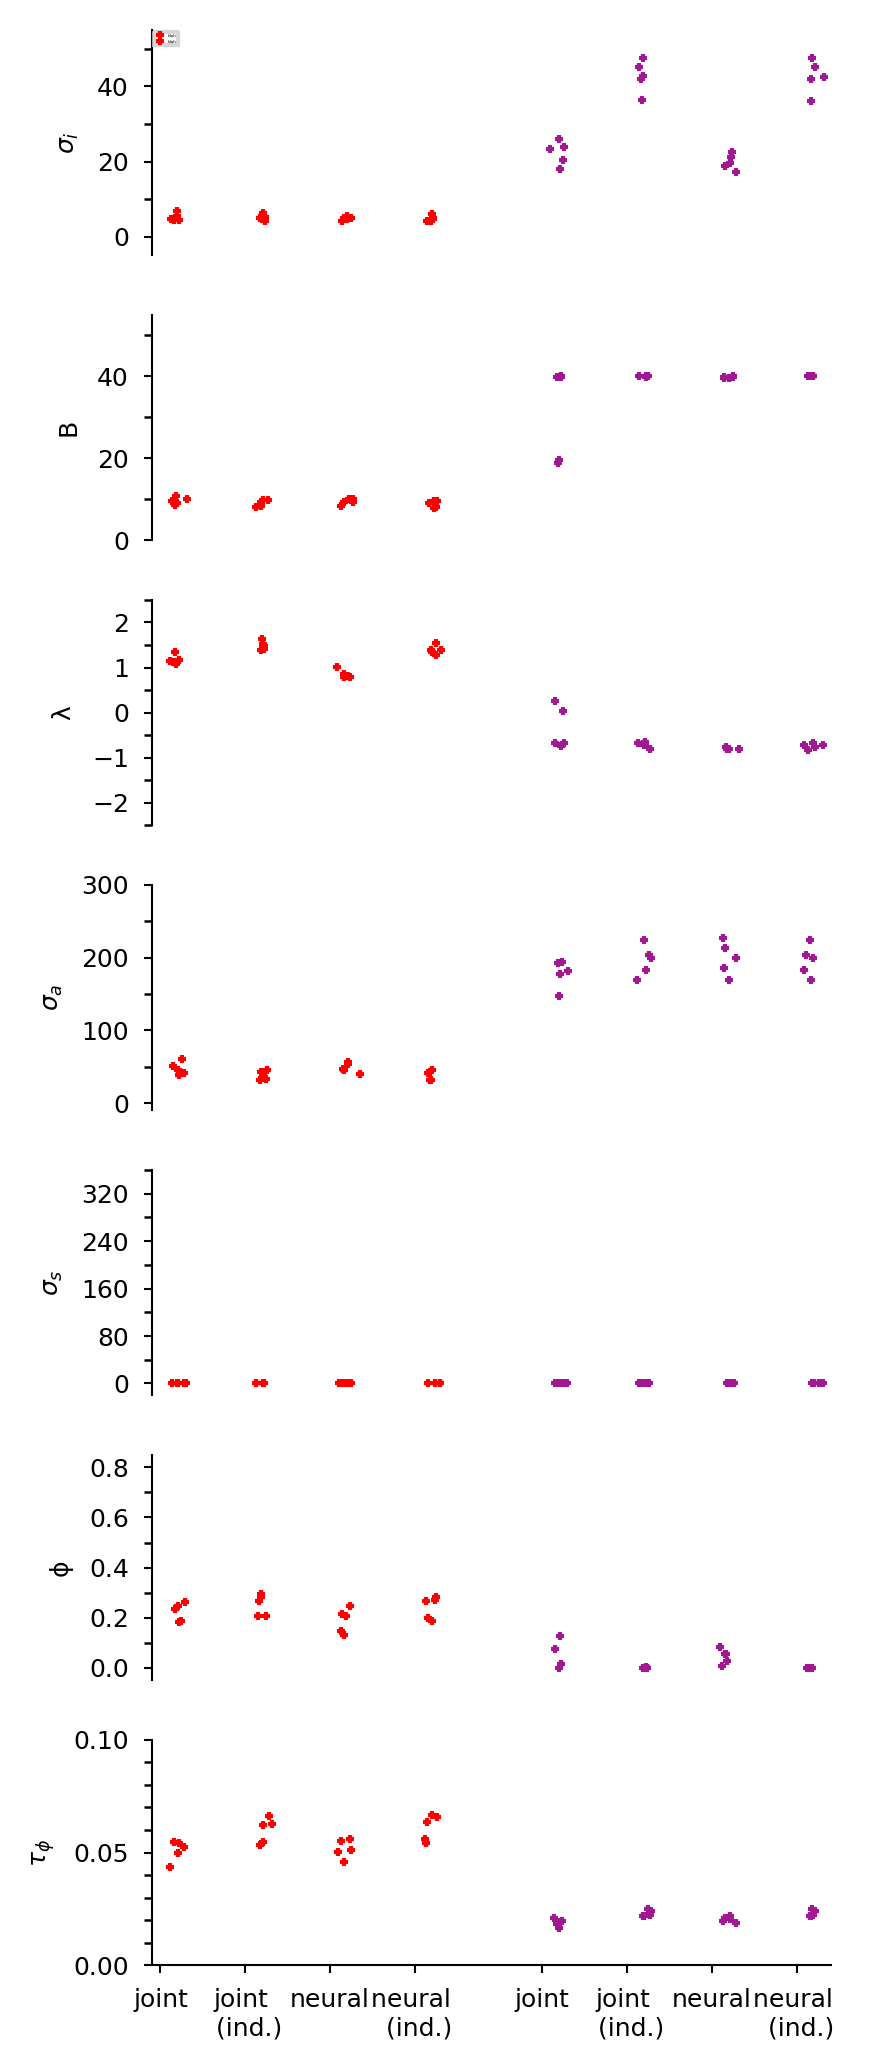

In [54]:
figure(figsize=(3, 7), dpi=300, frameon=true)
elinewidth=1
fs = 6
ms = 2
cs = 1.5
mycolors = ["red", "#1822A0", "#A01892"]

rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)
rc("font", family="sans-serif")

#tot_rats = length(mycolors)
blahs = vcat(["joint", "joint \n (ind.)", "neural", "neural \n (ind.)"], ["joint", "joint \n (ind.)", "neural", "neural \n (ind.)"])
#subplts = vcat(1:3:7*3, 2:3:7*3, 3:3:7*3)
#plt1 = [1.2,3.2,5.2]
#plt2 = [1.8,3.8,5.8]

for i = 1:7
    
    subplot(7,1,i)  
    j = 1
    plot(1.2 * ones(5) .+ (5e-2 .* randn(5)), x_joint_FOF[i], color=my_colors_FOF[1], marker="+",
        markersize=2, linestyle="none")
    plot(2.2 * ones(5) .+ (5e-2 .* randn(5)), x_joint_FOF_sep[i], color=my_colors_FOF[1], marker="+",
        markersize=2, linestyle="none")
    plot(3.2 * ones(5) .+ (5e-2 .* randn(5)), x_neural_FOF[i], color=my_colors_FOF[1], marker="+",
        markersize=2, linestyle="none", label="blah")
    plot(4.2 * ones(5) .+ (5e-2 .* randn(5)), x_neural_FOF_sep[i], color=my_colors_FOF[1], marker="+",
        markersize=2, linestyle="none", label="blah")
    
   
    j = 2
    plot(5.7 * ones(5) .+ (5e-2 .* randn(5)), x_joint_STR[i], color=my_colors_STR[1], marker="+",
        markersize=2, linestyle="none")
    plot(6.7 * ones(5) .+ (5e-2 .* randn(5)), x_joint_STR_sep[i], color=my_colors_STR[1], marker="+",
        markersize=2, linestyle="none")
    plot(7.7 * ones(5) .+ (5e-2 .* randn(5)), x_neural_STR[i], color=my_colors_STR[1], marker="+",
        markersize=2, linestyle="none")
    plot(8.7 * ones(5) .+ (5e-2 .* randn(5)), x_neural_STR_sep[i], color=my_colors_STR[1], marker="+",
        markersize=2, linestyle="none")
    

    ylabel(ps[i], fontsize=fs)
    xlim(0.9,8.9)
    
    ax = gca()
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    ax.spines["left"].set_linewidth(0.5)
    ax.tick_params(width=0.5, length=2)
    
    if i == 1
        legend(fontsize=1, loc="upper left")
        ylim(-5, 55)
        ax.set_yticks(range(0, stop=40, length=3), minor=false)  
        ax.set_yticks(range(0, stop=50, length=6), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 2
        ylim(0, 55)
        ax.set_yticks(range(0, stop=40, length=3), minor=false)  
        ax.set_yticks(range(0, stop=50, length=6), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 3
        ylim(-2.5, 2.5) 
        ax.set_yticks(range(-2, stop=2, length=5), minor=false)  
        ax.set_yticks(range(-2.5, stop=2.5, length=11), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 4
        ylim(-10, 300)
        ax.set_yticks(range(0, stop=300, length=4), minor=false)  
        ax.set_yticks(range(0, stop=300, length=7), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 5
        ylim(40 * -0.5, 40 * 9)
        ax.set_yticks(range(0, stop=40 * 8, length=5), minor=false)  
        ax.set_yticks(range(0, stop=40 * 9, length=10), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 6
        ylim(-0.05, 0.85)
        ax.set_yticks(range(0, stop=0.8, length=5), minor=false)
        ax.set_yticks(range(0, stop=0.8, length=9), minor=true)
        ax.xaxis.set_visible(false)
        ax.spines["bottom"].set_visible(false)
    elseif i == 7
        ylim(0., 0.10)
        ax.set_yticks(range(0, stop=0.1, length=3), minor=false)  
        ax.set_yticks(range(0, stop=0.1, length=11), minor=true)
        xticks(vcat(1:4, 5.5:8.5), blahs, rotation=0) 
        ax.spines["bottom"].set_linewidth(0.5)
    end
    
end

tight_layout()
PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Supp/Supp-parameters_.pdf")

## Use Sigma_i

In [60]:
flatten(neural_model_folds_STR_sep[1].θ)

55-element Vector{Float64}:
  42.491317332404186
  39.99986425949562
  -0.6800554863737305
 203.45333978292317
   0.5407327080138064
   0.0010001023205439758
   0.0242469737322717
   1.6029086069822034
   1.3810422031045804
   1.2412399161868553
   0.6402454000190397
   0.02685049110068571
  -0.48930004099367913
   ⋮
  -0.22960052969469524
  -1.0461394711207714
  -0.9973773458930292
  -0.7530676702736099
  -0.15819246874144394
  -0.3324706508606546
  -0.24637958808174218
   0.07677261510938344
   1.7081137074280692
  -0.7011739087344938
  -1.2304805792525866
  -0.46201849293396935

In [61]:
flatten(neural_model_folds_STR[1].θ)

55-element Vector{Float64}:
  21.172648437794525
  39.95355449213889
  -0.7626461652985859
 213.27957945090196
   0.001003982807002487
   0.0538653930818692
   0.01882752875374399
   1.691956418754939
   1.0908143084651953
   1.1636505130258261
   0.70350198133635
   0.019346715696140892
  -0.526479014582464
   ⋮
  -0.11044207183325414
  -0.7666325208434439
  -1.1262301015022655
  -0.7628226794195767
  -0.15981356850833536
  -0.3452983597939874
  -0.2243806756537963
   0.10303824842180719
  -1.5698699036497197
  -0.8323205744607509
  -1.3584378093363396
  -0.4897683331385297

In [85]:
fold = 1;
xfolds = flatten(neural_model_folds_STR_sep[fold].θ);
xfolds2 = flatten(neural_model_folds_STR[fold].θ);
xfolds3 = vcat(xfolds2[1], xfolds[2:end]);

In [123]:
LL_joint_STR_folds_switch = Vector{Float64}(undef,5)
joint_model_folds_STR_switch = Vector(undef,5)

region = "STR"
ntrials = length.(data_STR);

for fold in 1:5
    
    train = map(ntrials -> vcat(collect.(partition(1:ntrials, ceil(Int, ntrials/5)))[setdiff(1:5, fold)]...), ntrials)
    test = map((ntrials, train)-> setdiff(1:ntrials, train), ntrials, train)
    test_data_STR = map((data, train)-> data[train], data_STR, test)
    train_data_STR = map((data, train)-> data[train], data_STR, train)

    xfolds = flatten(joint_model_folds_STR_sep[fold].θ);
    xfolds2 = flatten(joint_model_folds_STR[fold].θ);
    xfolds3 = vcat(xfolds2[1], xfolds[2:end])
    #xfolds3 = vcat(xfolds2[1:end])
    
    f = all_Softplus(data_STR)      
    
    joint_model_folds_STR_switch[fold] = neural_choiceDDM(θneural_choice(xfolds3, f), test_data_STR, n, cross);

    LL_joint_STR_folds_switch[fold] = (pulse_input_DDM.sep_joint_loglikelihood(joint_model_folds_STR_switch[fold]))/(log(2) * 
        length(vcat(test...)));
    
end

In [124]:
LL_joint_STR_folds_switch

5-element Vector{Float64}:
 -103.27344876385962
 -104.035514898973
 -102.06863681320301
 -101.2390608339242
  -98.68478250251222

In [125]:
LL_joint_STR_folds_sep

5-element Vector{Float64}:
 -103.23063774430663
 -104.02929405716459
 -102.04901934578645
 -101.20288269751951
  -98.5883712948498

In [126]:
LL_joint_STR_folds

5-element Vector{Float64}:
 -103.5971360317222
 -104.2578335346035
 -102.34732411038634
 -101.50765608247852
  -99.4403710904737

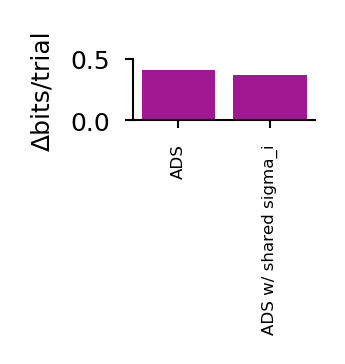

In [127]:
figure(figsize=(1.25, 1.25), dpi=300, frameon=true)

mycolors = ["red", "#A01892"]
rc("xtick", labelsize=6)
rc("ytick", labelsize=6)

bar(1, mean(LL_joint_STR_folds_sep - LL_joint_STR_folds), color=mycolors[2]);
bar(2, mean(LL_joint_STR_folds_switch - LL_joint_STR_folds), color=mycolors[2]);

xticks([1, 2], ["ADS", "ADS w/ shared sigma_i"], rotation=90, fontsize=4)
ylabel("Δbits/trial", fontsize=6);

ax = gca()
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1.5)
ax.set_ylim(0, 0.5)

tight_layout()
PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Supp/joint_switch.pdf")